In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [11]:
# Load File
df = pd.read_csv(r'C:\Users\KOWSALYA\OneDrive\Documents\customer_churn.csv')

In [12]:
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMERID          1000 non-null   int64 
 1   AGE                 1000 non-null   int64 
 2   GENDER              1000 non-null   object
 3   LOCATION            1000 non-null   object
 4   TOTAL_SPEND         1000 non-null   int64 
 5   PURCHASE_FREQUENCY  1000 non-null   int64 
 6   LAST_PURCHASE_DAYS  1000 non-null   int64 
 7   COMPLAINT_TICKETS   1000 non-null   int64 
 8   WEBSITE_VISITS      1000 non-null   int64 
 9   CHURN               1000 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 78.3+ KB


Index(['CUSTOMERID', 'AGE', 'GENDER', 'LOCATION', 'TOTAL_SPEND',
       'PURCHASE_FREQUENCY', 'LAST_PURCHASE_DAYS', 'COMPLAINT_TICKETS',
       'WEBSITE_VISITS', 'CHURN'],
      dtype='object')

In [16]:
#Data Preprocessing
df.isnull().sum()
df['GENDER'] = df['GENDER'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['LOCATION'], drop_first=True)

In [21]:
#Define Features & Target
X = df.drop(['CHURN', 'CUSTOMERID'], axis=1)  # Drop ID and target
y = df['CHURN']

In [23]:
#Train-Test Split
X = df.drop('CHURN', axis=1)
y = df['CHURN']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
#Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=['GENDER'], drop_first=True)

In [35]:
#Define Features and Target
X = df_encoded.drop(['CUSTOMERID', 'CHURN'], axis=1)
y = df_encoded['CHURN']

In [37]:
print(df.columns)

Index(['CUSTOMERID', 'AGE', 'GENDER', 'TOTAL_SPEND', 'PURCHASE_FREQUENCY',
       'LAST_PURCHASE_DAYS', 'COMPLAINT_TICKETS', 'WEBSITE_VISITS', 'CHURN',
       'LOCATION_Houston', 'LOCATION_Los Angeles', 'LOCATION_New York',
       'LOCATION_San Francisco'],
      dtype='object')


In [41]:
#Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
#Build Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.695
Confusion Matrix:
 [[139   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



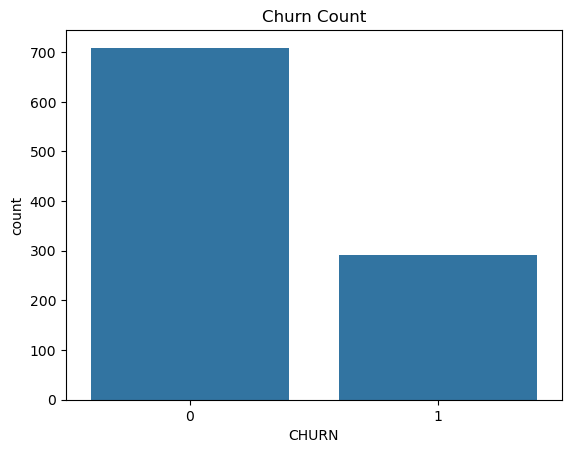

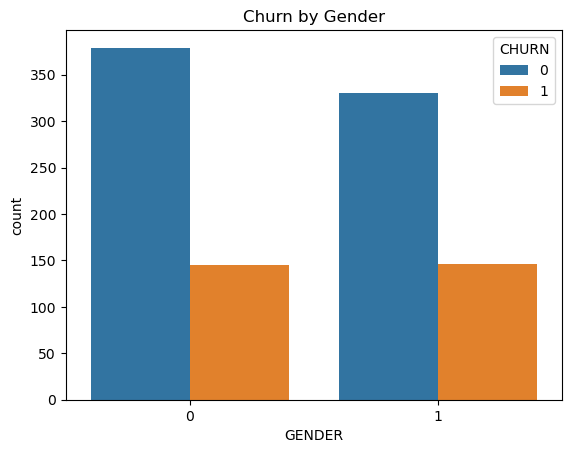

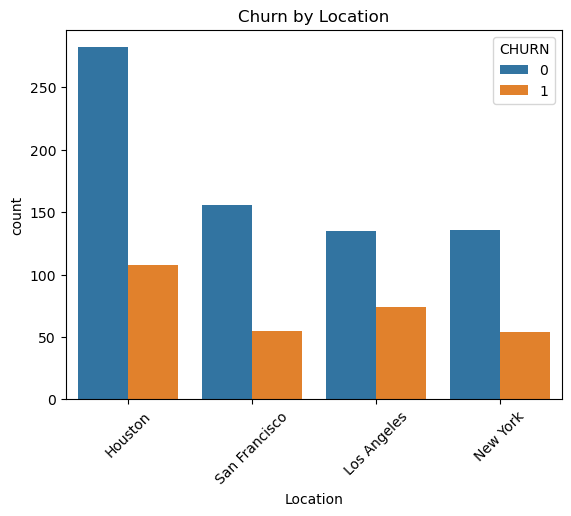

In [54]:
#Visualizations
# Churn Distribution
sns.countplot(x='CHURN', data=df)
plt.title('Churn Count')
plt.show()

# Gender vs Churn
sns.countplot(x='GENDER', hue='CHURN', data=df)
plt.title('Churn by Gender')
plt.show()

# Location-wise Churn (based on one-hot encoded columns)
location_cols = ['LOCATION_Houston', 'LOCATION_Los Angeles', 'LOCATION_New York', 'LOCATION_San Francisco']
location_names = ['Houston', 'Los Angeles', 'New York', 'San Francisco']

churn_by_location = df[location_cols + ['CHURN']].copy()
churn_by_location['Location'] = churn_by_location[location_cols].idxmax(axis=1).str.replace('LOCATION_', '')

sns.countplot(x='Location', hue='CHURN', data=churn_by_location)
plt.title('Churn by Location')
plt.xticks(rotation=45)
plt.show()


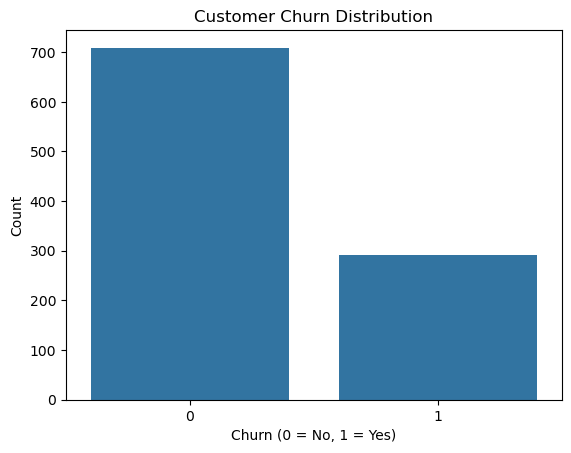